# Gaussian Kernel SVM

The Gaussian kernel, also known as the Radial Basis Function (RBF) kernel, is one of the more powerful kernels used to create classifications for datasets. It essentially classifies regions of data instead of simply splitting the data into regions, which can be very helpful in the scenario shown:

<img src="circularDataset.png" width="400px" alt="Circular Dataset" />

To properly classify the regions of the dataset, we need to use the Gaussian function, which is:

$$\LARGE K(\vec{x}, \vec{l^{i}} ) = \epsilon^{-\frac{||\vec{x} - \vec{l^i}||^2}{2\sigma^2}}$$

__Where:__
* __l__ - The landmark, the center of the data region.
* __i__ - The landmark number. There can be many landmarks designated to a dataset.
* __$\sigma$__ - The circumference of elevated values (values greater than 0).

In the graph shown below, an example of the Gaussian function is shown. The __x__ represents the data point, while the circle represents the landmark. All values in the graph with noticable elevation are part of a different classification than those without the noticeable elevation.

<img src="rbfGraph.png" width="400px" alt="Radial Basis Function Graph for 2D dataset." />

Sigma directly scales with the circumference of elevated values in the graph, a higher sigma value producing a larger circumference.

<img src="sigma.png" width="400px" alt="Higher sigma value increasing the circumference of the dataset." />

Multiple landmarks are usually created to deal with the variation in data. For example:

<img src="multipleLandmarks.png" width="600px" alt="Multiple Landmarks classifying an area." />

<hr>

## Code

__Setting up the Dataset:__

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Advertisements.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<hr>

__Fitting the Classifier & Making Predictions__

In [2]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

VERTICAL_ALIGNMENT = 1;
np.concatenate((
    y_pred.reshape(len(y_pred), VERTICAL_ALIGNMENT),
    y_test.reshape(len(y_pred), VERTICAL_ALIGNMENT)
    ), VERTICAL_ALIGNMENT)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

<hr>

__Creating the Confusion Matrix:__

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[64  4]
 [ 3 29]]
0.93


<hr>

__Visualizing Training Results:__

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


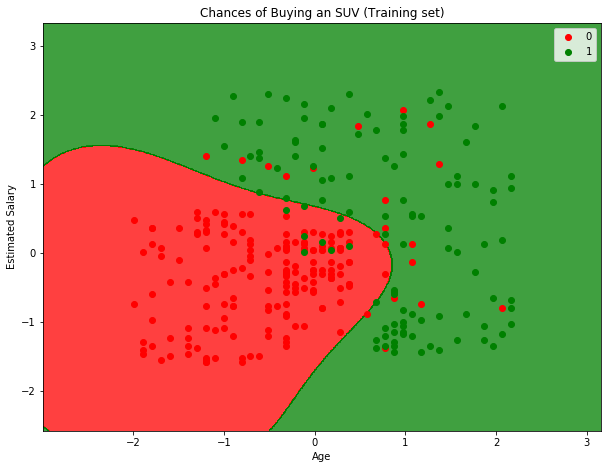

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


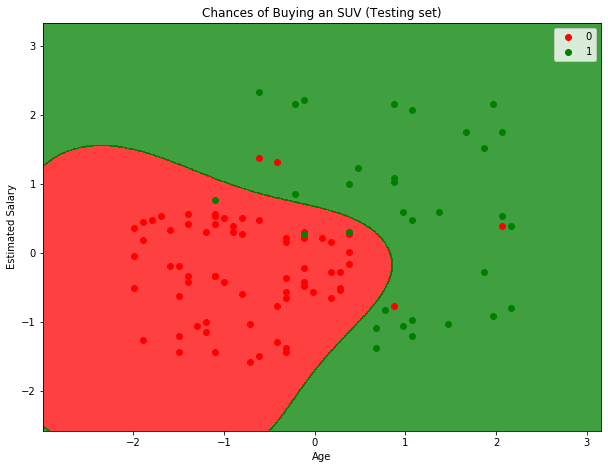

In [5]:
# Graph Scaling
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

#Classification Visualizer function:
def display(X_set, y_set, type):
    from matplotlib.colors import ListedColormap
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for index, value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == value, 0], X_set[y_set == value, 1],
                    c = ListedColormap(('red', 'green'))(index), label = value)
        
    plt.title('Chances of Buying an SUV (' + type + ' set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

#Displaying the results for the training and test sets.
display(X_train, y_train, 'Training')
display(X_test, y_test, 'Testing')

__Results__:
<br>
The graph isn't linear due to the methodology of the Gaussian kernel. The red region is created to surround the red datapoints, a task that has been performed well using the Gaussian function. In fact, there are only 7 errors in this test set. According to the test set, this makes the Gaussian SVM the most helpful classifier so far. 